In [1]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Mounted at /content/gdrive
Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
!uname -a
! host

Linux 5756236ea41f 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64 x86_64 x86_64 GNU/Linux
/bin/bash: host: command not found


In [ ]:
! ls -al /content/gdrive/MyDrive/evalwav | wc

ls: cannot open directory '/content/gdrive/MyDrive/evalwav': Input/output error
      0       0       0


In [3]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import time
evalf = '/content/gdrive/My Drive/eval.csv'
evalcsv = pd.read_csv(evalf)
dfvalid = pd.DataFrame(evalcsv)
print(dfvalid.info())
print(dfvalid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fname   10231 non-null  int64 
 1   labels  10231 non-null  object
 2   mids    10231 non-null  object
dtypes: int64(1), object(2)
memory usage: 239.9+ KB
None
    fname                                             labels  \
0   37199  Electric_guitar,Guitar,Plucked_string_instrume...   
1  175151  Electric_guitar,Guitar,Plucked_string_instrume...   
2  253463  Electric_guitar,Guitar,Plucked_string_instrume...   
3  329838  Electric_guitar,Guitar,Plucked_string_instrume...   
4    1277  Electric_guitar,Guitar,Plucked_string_instrume...   

                                            mids  
0  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
1  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
2  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
3  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
4  /m/02sgy,/m/

In [4]:
dev_audio_dir = '/content/gdrive/MyDrive/evalwav/'
dev_png_dir = '/content/gdrive/MyDrive/validpng/'
dfvalid["wavfiles"] = dfvalid.apply(lambda row: dev_audio_dir+str(row.fname)+'.wav', axis=1)
dfvalid["figfiles"] = dfvalid.apply(lambda row: dev_png_dir+str(row.fname)+'.png', axis=1)

dfvalid.info()
dfvalid.head()
startime = time.ctime()
print(time.ctime())
srhz=44100
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     10231 non-null  int64 
 1   labels    10231 non-null  object
 2   mids      10231 non-null  object
 3   wavfiles  10231 non-null  object
 4   figfiles  10231 non-null  object
dtypes: int64(1), object(4)
memory usage: 399.8+ KB
Sun May 15 10:26:21 2022


In [6]:
rowcount=dfvalid.shape[0]
print(rowcount)
dfv_1 = dfvalid.iloc[1380:2000,:]
dfv_2 = dfvalid.iloc[3140:4000,:]
dfv_3 = dfvalid.iloc[5050:6000,:]
dfv_4 = dfvalid.iloc[6685:8000,:]
dfv_5 = dfvalid.iloc[9360:,:]

10231


In [8]:
def generate_melspec(df):
  filect = 0
  for i in df.itertuples():
    filect = filect+1
    file = i[4]
    #print('wav file: '+file)
    pngfile = i[5]
    #print('png file: '+pngfile)
    print('FileCount = '+str(filect)+': Working on spectogram '+pngfile)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    #hop_length = 11025 # in num. of samples
    #n_fft = 42336 # window in num. of samples
    hop_length=512
    n_fft=2048
    fmin=20
    fmax=8300
    top_db=80
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    n_mels = 128
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=n_mels)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram,
                                             n_fft=n_fft, hop_length=hop_length,
                                             win_length=None, window='hann',
                                             center=True, pad_mode='reflect', n_mels=n_mels,
                                             fmin=fmin, fmax=fmax)
    log_mel_spectrogram = librosa.power_to_db(melspec, top_db=top_db)
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    # uncomment the line below to create 224x224 pngs
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')


Working on subset from dfv_1
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/validpng/395629.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/validpng/72558.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/validpng/127857.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/validpng/361333.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/validpng/168825.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/validpng/88445.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/validpng/430983.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/validpng/117126.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/validpng/68999.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/validpng/157580.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/validpng/19853.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/validpng/189327.png


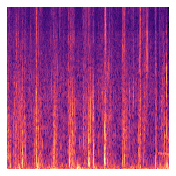

In [ ]:
print('Working on subset from dfv_1')
generate_melspec(dfv_1)
print(time.ctime())
print('Done working with dfv_1')

In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc
! mv /content/gdrive/MyDrive/validpng/* /content/gdrive/MyDrive/dumpvalidpng/
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc

      0       0       0
   2000    2000   21503
   2000    2000   21503
      0       0       0


Working on subset from dfv_2
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/validpng/270271.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/validpng/153538.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/validpng/122822.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/validpng/243654.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/validpng/255951.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/validpng/198611.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/validpng/407517.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/validpng/339942.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/validpng/366577.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/validpng/180226.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/validpng/219668.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/validpng/119833.

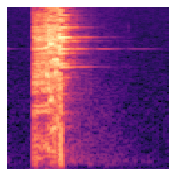

In [ ]:
print('Working on subset from dfv_2')
generate_melspec(dfv_2)
print(time.ctime())
print('Done working with dfv_2')
# FileCount = 1138: Working on spectogram /content/gdrive/MyDrive/validpng/22459.png
#FileCount = 1139: Working on spectogram /content/gdrive/MyDrive/validpng/22460.png
#FileCount = 1140: Working on spectogram /content/gdrive/MyDrive/validpng/270271.png
#FileCount = 1141: Working on spectogram /content/gdrive/MyDrive/validpng/153538.png
#FileCount = 1142: Working on spectogram /content/gdrive/MyDrive/validpng/122822.png
#FileCount = 1143: Working on spectogram /content/gdrive/MyDrive/validpng/243654.png

In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc
! mv /content/gdrive/MyDrive/validpng/* /content/gdrive/MyDrive/dumpvalidpng/
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc

   2000    2000   21503
   2043    2043   21983
   3999    3999   43012
      0       0       0


Working on subset from dfv_3
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/validpng/36111.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/validpng/60184.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/validpng/380203.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/validpng/167728.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/validpng/252210.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/validpng/104243.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/validpng/104244.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/validpng/104248.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/validpng/132418.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/validpng/183112.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/validpng/20296.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/validpng/20299.png


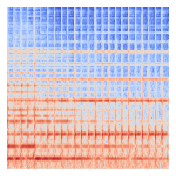

In [ ]:
print('Working on subset from dfv_3')
generate_melspec(dfv_3)
print(time.ctime())
print('Done working with dfv_3')

In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc
! mv /content/gdrive/MyDrive/validpng/* /content/gdrive/MyDrive/dumpvalidpng/
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc

   3999    3999   43012
   1999    1999   21446
   5998    5998   64458
      0       0       0


Working on subset from dfv_4
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/validpng/205740.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/validpng/45603.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/validpng/195178.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/validpng/428668.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/validpng/49020.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/validpng/343169.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/validpng/391293.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/validpng/353104.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/validpng/418786.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/validpng/340363.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/validpng/50178.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/validpng/50179.png


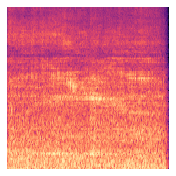

In [ ]:
print('Working on subset from dfv_4')
generate_melspec(dfv_4)
print(time.ctime())
print('Done working with dfv_4')
#FileCount = 683: Working on spectogram /content/gdrive/MyDrive/validpng/337102.png
#FileCount = 684: Working on spectogram /content/gdrive/MyDrive/validpng/272410.png
#FileCount = 685: Working on spectogram /content/gdrive/MyDrive/validpng/205740.png
#FileCount = 686: Working on spectogram /content/gdrive/MyDrive/validpng/45603.png
#FileCount = 687: Working on spectogram /content/gdrive/MyDrive/validpng/195178.png
#FileCount = 688: Working on spectogram /content/gdrive/MyDrive/validpng/428668.png
#FileCount = 689: Working on spectogram /content/gdrive/MyDrive/validpng/49020.png
#FileCount = 690: Working on spectogram /content/gdrive/MyDrive/validpng/343169.png
#FileCount = 691: Working on spectogram /content/gdrive/MyDrive/validpng/391293.png
#FileCount = 692: Working on spectogram /content/gdrive/MyDrive/validpng/353104.png

In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc
! mv /content/gdrive/MyDrive/validpng/* /content/gdrive/MyDrive/dumpvalidpng/
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc

   5998    5998   64458
   1999    1999   21518
   7997    7997   85976
      0       0       0


Working on subset from dfv_5
FileCount = 1: Working on spectogram /content/gdrive/MyDrive/validpng/275338.png
FileCount = 2: Working on spectogram /content/gdrive/MyDrive/validpng/389992.png
FileCount = 3: Working on spectogram /content/gdrive/MyDrive/validpng/377736.png
FileCount = 4: Working on spectogram /content/gdrive/MyDrive/validpng/427160.png
FileCount = 5: Working on spectogram /content/gdrive/MyDrive/validpng/402146.png
FileCount = 6: Working on spectogram /content/gdrive/MyDrive/validpng/391917.png
FileCount = 7: Working on spectogram /content/gdrive/MyDrive/validpng/275336.png
FileCount = 8: Working on spectogram /content/gdrive/MyDrive/validpng/389651.png
FileCount = 9: Working on spectogram /content/gdrive/MyDrive/validpng/389612.png
FileCount = 10: Working on spectogram /content/gdrive/MyDrive/validpng/367005.png
FileCount = 11: Working on spectogram /content/gdrive/MyDrive/validpng/402164.png
FileCount = 12: Working on spectogram /content/gdrive/MyDrive/validpng/407634.

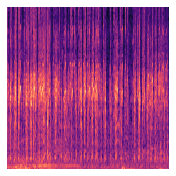

In [9]:
print('Working on subset from dfv_5')
generate_melspec(dfv_5)
print(time.ctime())
print('Done working with dfv_5')

In [3]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc
! mv /content/gdrive/MyDrive/validpng/* /content/gdrive/MyDrive/dumpvalidpng/
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng | wc

   7997    7997   85976
   2230    2230   24081
  10227   10227  110057
      0       0       0
